<a href="https://colab.research.google.com/github/Raghav961/Customer_segmentation/blob/main/Exposys.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing Dependencies

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

Data colletion & analysis

In [ ]:
# loading the data from csv file to pandas dataframe
customer_data =pd.read_csv("/content/Mall_Customers.csv")

In [ ]:
#first 5 rows in dataframe
customer_data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
# finding the no.of rows and columns
customer_data.shape

(200, 5)

In [ ]:
# getting info about the dataset
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [ ]:
#checking for missing values in dataset
customer_data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [ ]:
customer_data.drop(["CustomerID"],axis=1,inplace=True)

In [ ]:
customer_data.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


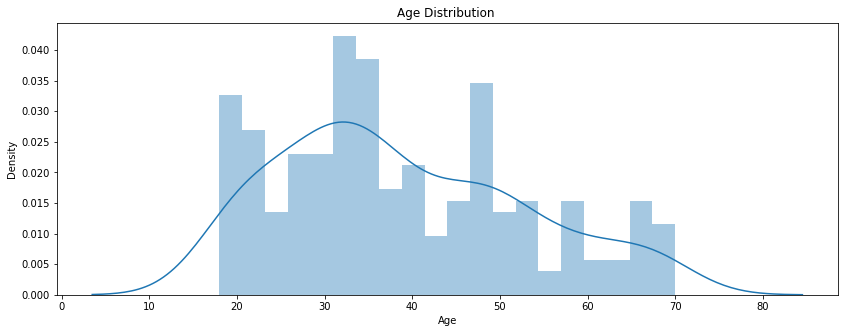

In [ ]:
#Distribution graph for age
plt.figure(1,figsize=(14,5))
n=0
for x in['Age']:
  n+=1
  plt.subplot(1,1,n)
  plt.subplots_adjust(hspace=0.5,wspace=0.5)
  sns.distplot(customer_data[x],bins=20)
  plt.title('Age Distribution '.format(x))
  plt.show()

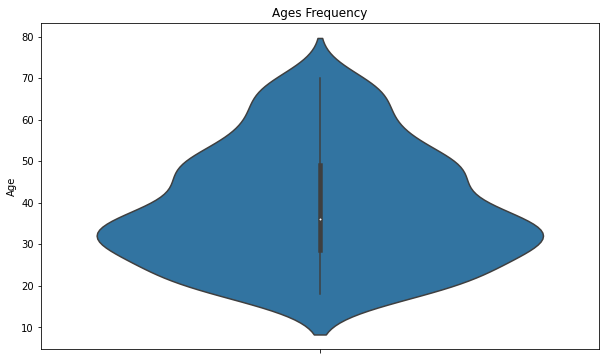

In [ ]:
plt.figure(figsize=(10,6))
plt.title("Ages Frequency")
sns.axes_style("dark")
sns.violinplot(y=customer_data["Age"])
plt.show()

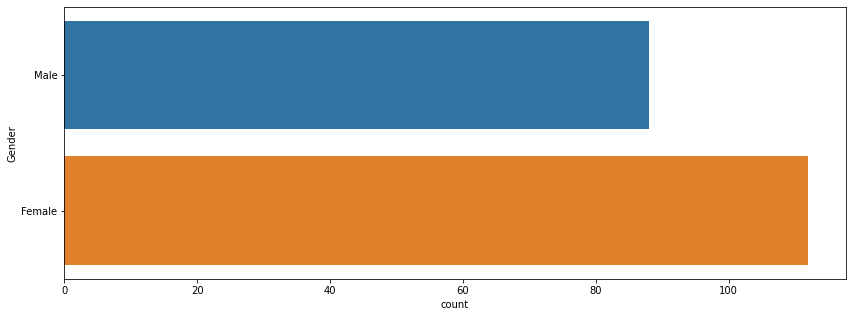

In [ ]:
plt.figure(figsize=(14,5))
sns.countplot(y="Gender",data=customer_data)
plt.show()

In [ ]:
x1=customer_data.iloc[:,[2,3]].values
print(x1)

[[ 15  39]
 [ 15  81]
 [ 16   6]
 [ 16  77]
 [ 17  40]
 [ 17  76]
 [ 18   6]
 [ 18  94]
 [ 19   3]
 [ 19  72]
 [ 19  14]
 [ 19  99]
 [ 20  15]
 [ 20  77]
 [ 20  13]
 [ 20  79]
 [ 21  35]
 [ 21  66]
 [ 23  29]
 [ 23  98]
 [ 24  35]
 [ 24  73]
 [ 25   5]
 [ 25  73]
 [ 28  14]
 [ 28  82]
 [ 28  32]
 [ 28  61]
 [ 29  31]
 [ 29  87]
 [ 30   4]
 [ 30  73]
 [ 33   4]
 [ 33  92]
 [ 33  14]
 [ 33  81]
 [ 34  17]
 [ 34  73]
 [ 37  26]
 [ 37  75]
 [ 38  35]
 [ 38  92]
 [ 39  36]
 [ 39  61]
 [ 39  28]
 [ 39  65]
 [ 40  55]
 [ 40  47]
 [ 40  42]
 [ 40  42]
 [ 42  52]
 [ 42  60]
 [ 43  54]
 [ 43  60]
 [ 43  45]
 [ 43  41]
 [ 44  50]
 [ 44  46]
 [ 46  51]
 [ 46  46]
 [ 46  56]
 [ 46  55]
 [ 47  52]
 [ 47  59]
 [ 48  51]
 [ 48  59]
 [ 48  50]
 [ 48  48]
 [ 48  59]
 [ 48  47]
 [ 49  55]
 [ 49  42]
 [ 50  49]
 [ 50  56]
 [ 54  47]
 [ 54  54]
 [ 54  53]
 [ 54  48]
 [ 54  52]
 [ 54  42]
 [ 54  51]
 [ 54  55]
 [ 54  41]
 [ 54  44]
 [ 54  57]
 [ 54  46]
 [ 57  58]
 [ 57  55]
 [ 58  60]
 [ 58  46]
 [ 59  55]

In [ ]:
#finding WCSS value for different no.of clusters
wcss=[]
for i in range(1,11):
  kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42)
  kmeans.fit(x1)

  wcss.append(kmeans.inertia_)


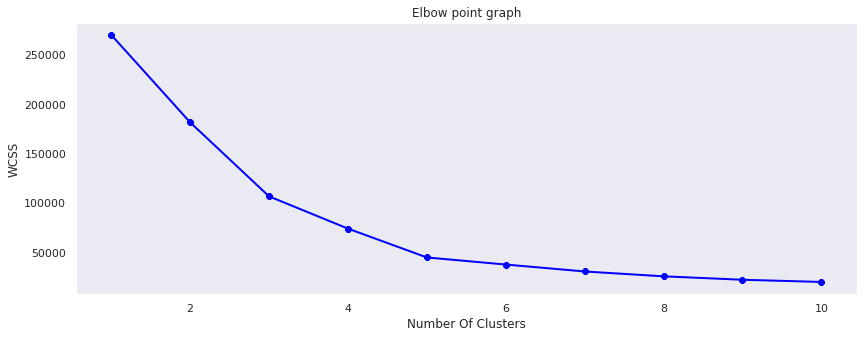

In [ ]:
#Elbow graph
sns.set()
plt.figure(figsize=(14,5))
plt.grid()
plt.plot(range(1,11),wcss,linewidth=2,color="blue",marker="8")
plt.title("Elbow point graph")
plt.xlabel('Number Of Clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
#training the K-means clustering model
kmeans=KMeans(n_clusters=5,init='k-means++',random_state=0)
y=kmeans.fit_predict(x1)
print(y)

[3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3
 1 3 1 3 1 3 0 3 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 2 4 2 0 2 4 2 4 2 0 2 4 2 4 2 4 2 4 2 0 2 4 2 4 2
 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4
 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2]


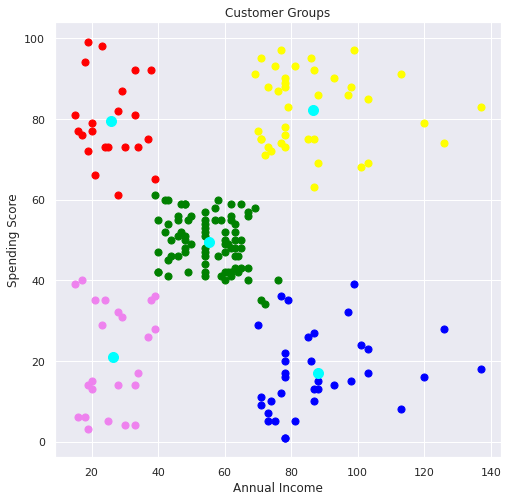

In [ ]:
#plotting all clsters and their centroids
plt.figure(figsize=(8,8))
plt.scatter(x1[y==0,0], x1[y==0,1], s=50, c='green', label='Cluster 1')
plt.scatter(x1[y==1,0], x1[y==1,1], s=50, c='red', label='Cluster 2')
plt.scatter(x1[y==2,0], x1[y==2,1], s=50, c='yellow', label='Cluster 3')
plt.scatter(x1[y==3,0], x1[y==3,1], s=50, c='violet', label='Cluster 4')
plt.scatter(x1[y==4,0], x1[y==4,1], s=50, c='blue', label='Cluster 5')

#plot the centroids
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=100, c='cyan', label='Centroids')

plt.title('Customer Groups')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


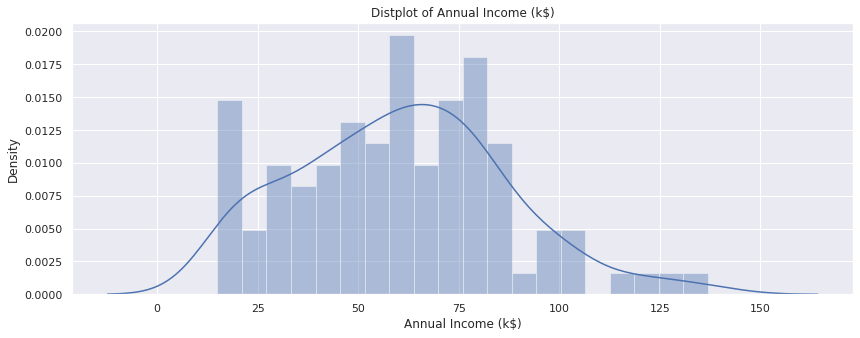

In [ ]:
#distribution graph for annual income
plt.figure(1,figsize=(14,5))
n=0
for x in['Annual Income (k$)']:
  n+=1
  plt.subplot(1,1,n)
  plt.subplots_adjust(hspace=0.5,wspace=0.5)
  sns.distplot(customer_data[x],bins=20)
  plt.title('Distplot of {}'.format(x))
  plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


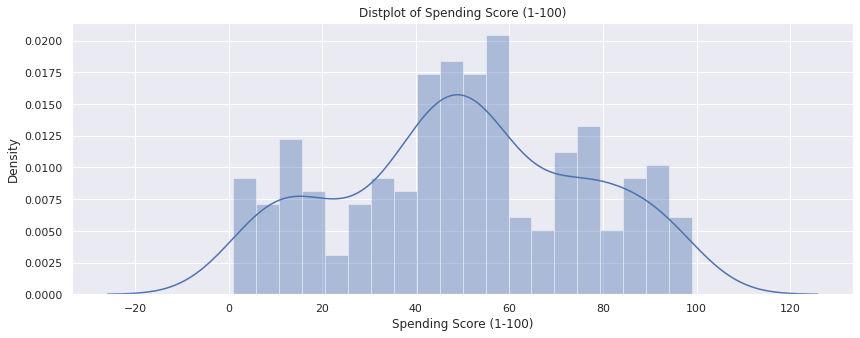

In [ ]:
#Distribution graph for spending score
plt.figure(1,figsize=(14,5))
n=0
for x in['Spending Score (1-100)']:
  n+=1
  plt.subplot(1,1,n)
  plt.subplots_adjust(hspace=0.5,wspace=0.5)
  sns.distplot(customer_data[x],bins=20)
  plt.title('Distplot of {}'.format(x))
  plt.show()


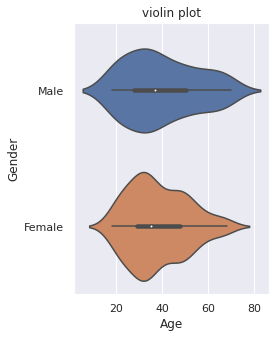

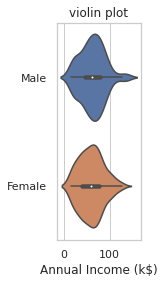

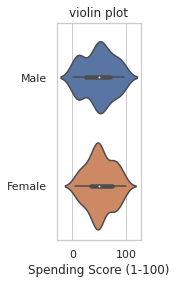

In [ ]:
plt.figure(1,figsize=(14,5))
n=0
for cols in('Age','Annual Income (k$)','Spending Score (1-100)'):
  n+=1
  plt.subplot(1,3,n)
  sns.set(style="whitegrid")
  plt.subplots_adjust(hspace=0.5,wspace=0.5)
  sns.violinplot(x=cols,y='Gender',data=customer_data)
  plt.ylabel('Gender' if n==1 else'')
  plt.title('violin plot')
  plt.show()

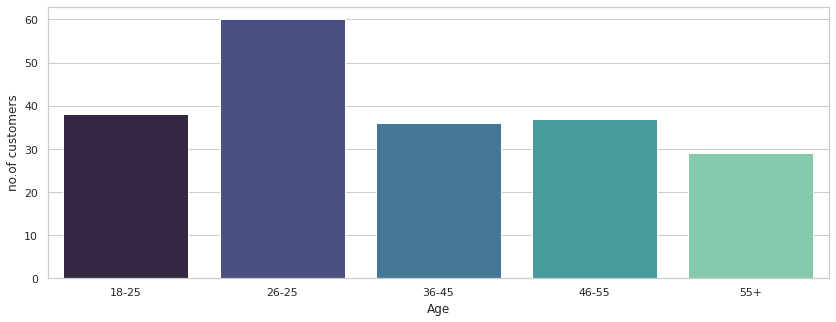

In [ ]:
#dividing the age into groups and visualising the data to know the range of customers contributing 
age_18_25=customer_data.Age[(customer_data.Age>=18)&(customer_data.Age<=25)]
age_26_35=customer_data.Age[(customer_data.Age>=26)&(customer_data.Age<=35)]
age_36_45=customer_data.Age[(customer_data.Age>=36)&(customer_data.Age<=45)]
age_46_55=customer_data.Age[(customer_data.Age>=46)&(customer_data.Age<=55)]
age_55above=customer_data.Age[(customer_data.Age>=56)]
agex=["18-25","26-25","36-45","46-55","55+"]
agey=[len(age_18_25.values),len(age_26_35.values),len(age_36_45.values),len(age_46_55.values),len(age_55above.values)]
plt.figure(figsize=(14,5))
sns.barplot(x=agex,y=agey,palette="mako")
plt.xlabel("Age")
plt.ylabel("no.of customers")
plt.show()

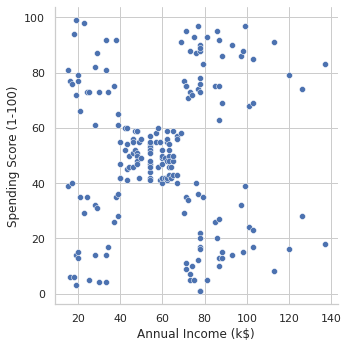

In [ ]:
#relation between annual and spending score
sns.relplot(x="Annual Income (k$)",y="Spending Score (1-100)",data=customer_data)

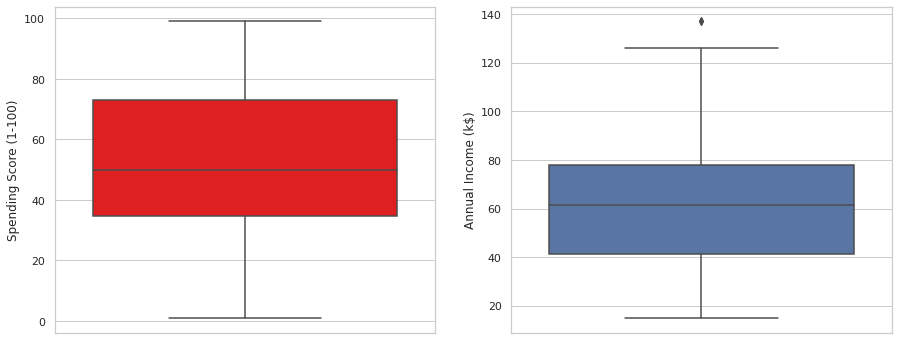

In [ ]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.boxplot(y=customer_data["Spending Score (1-100)"], color="red")
plt.subplot(1,2,2)
sns.boxplot(y=customer_data["Annual Income (k$)"])
plt.show()

Visualizing no.of customers based on scores

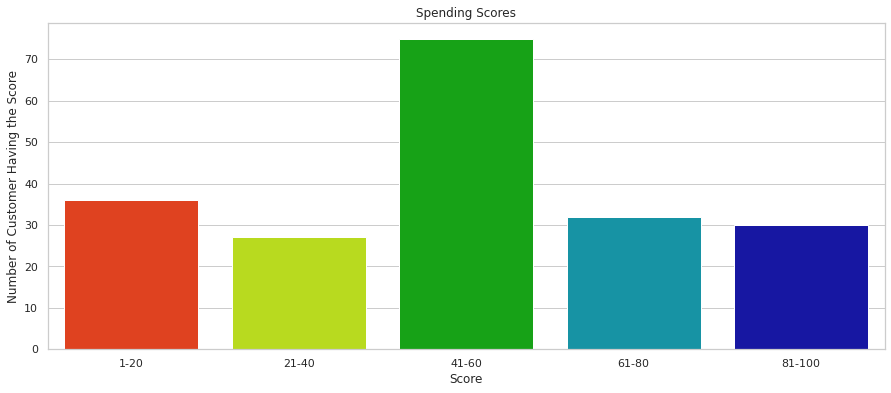

In [ ]:
ss1_20 = customer_data["Spending Score (1-100)"][(customer_data["Spending Score (1-100)"] >= 1) & (customer_data["Spending Score (1-100)"] <= 20)]
ss21_40 = customer_data["Spending Score (1-100)"][(customer_data["Spending Score (1-100)"] >= 21) & (customer_data["Spending Score (1-100)"] <= 40)]
ss41_60 = customer_data["Spending Score (1-100)"][(customer_data["Spending Score (1-100)"] >= 41) & (customer_data["Spending Score (1-100)"] <= 60)]
ss61_80 = customer_data["Spending Score (1-100)"][(customer_data["Spending Score (1-100)"] >= 61) & (customer_data["Spending Score (1-100)"] <= 80)]
ss81_100 =customer_data["Spending Score (1-100)"][(customer_data["Spending Score (1-100)"] >= 81) & (customer_data["Spending Score (1-100)"] <= 100)]

ssx = ["1-20", "21-40", "41-60", "61-80", "81-100"]
ssy = [len(ss1_20.values), len(ss21_40.values), len(ss41_60.values), len(ss61_80.values), len(ss81_100.values)]

plt.figure(figsize=(15,6))
sns.barplot(x=ssx, y=ssy, palette="nipy_spectral_r")
plt.title("Spending Scores")
plt.xlabel("Score")
plt.ylabel("Number of Customer Having the Score")
plt.show()

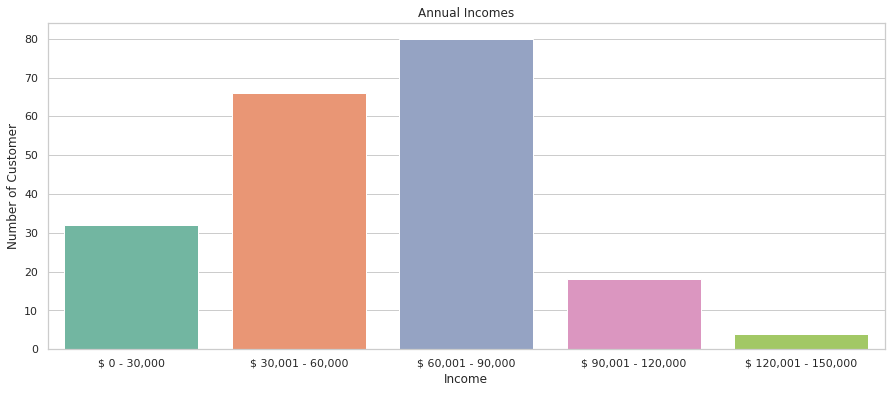

In [ ]:
ai0_30 = customer_data["Annual Income (k$)"][(customer_data["Annual Income (k$)"] >= 0) & (customer_data["Annual Income (k$)"] <= 30)]
ai31_60 = customer_data["Annual Income (k$)"][(customer_data["Annual Income (k$)"] >= 31) & (customer_data["Annual Income (k$)"] <= 60)]
ai61_90 = customer_data["Annual Income (k$)"][(customer_data["Annual Income (k$)"] >= 61) & (customer_data["Annual Income (k$)"] <= 90)]
ai91_120 = customer_data["Annual Income (k$)"][(customer_data["Annual Income (k$)"] >= 91) & (customer_data["Annual Income (k$)"] <= 120)]
ai121_150 = customer_data["Annual Income (k$)"][(customer_data["Annual Income (k$)"] >= 121) & (customer_data["Annual Income (k$)"] <= 150)]

aix = ["$ 0 - 30,000", "$ 30,001 - 60,000", "$ 60,001 - 90,000", "$ 90,001 - 120,000", "$ 120,001 - 150,000"]
aiy = [len(ai0_30.values), len(ai31_60.values), len(ai61_90.values), len(ai91_120.values), len(ai121_150.values)]

plt.figure(figsize=(15,6))
sns.barplot(x=aix, y=aiy, palette="Set2")
plt.title("Annual Incomes")
plt.xlabel("Income")
plt.ylabel("Number of Customer")
plt.show()

K-Means

K-means clustering is a type of unsupervised learning which is used when you have unlabeled data. By using this algorithm you will try to find groups in the data. "k" value represent number of groups.

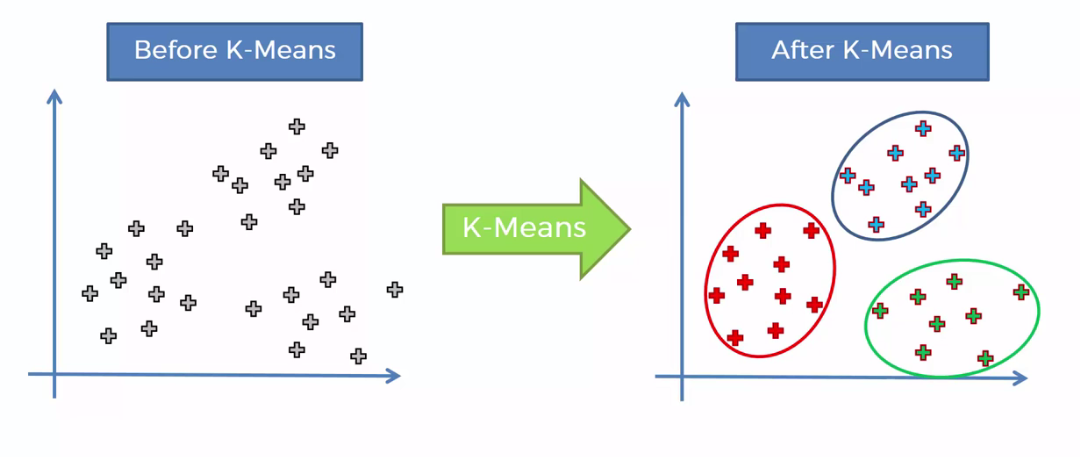

We will use Age, Annual Income and Spending Score for clustering customers. Let's look how our plot is seen without clustering

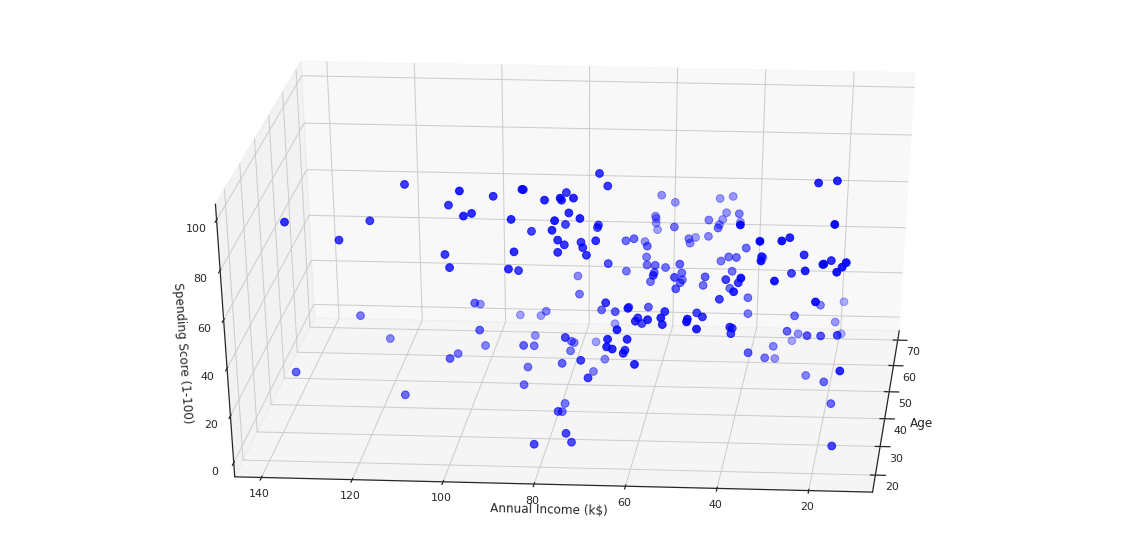

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

sns.set_style("white")
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(customer_data.Age, customer_data["Annual Income (k$)"], customer_data["Spending Score (1-100)"], c='blue', s=60)
ax.view_init(30, 185)
plt.xlabel("Age")
plt.ylabel("Annual Income (k$)")
ax.set_zlabel('Spending Score (1-100)')
plt.show()

When we use elbow method in the above we may say 5 will be our number of cluster. Let's use K-Means and see how our plot will look like.

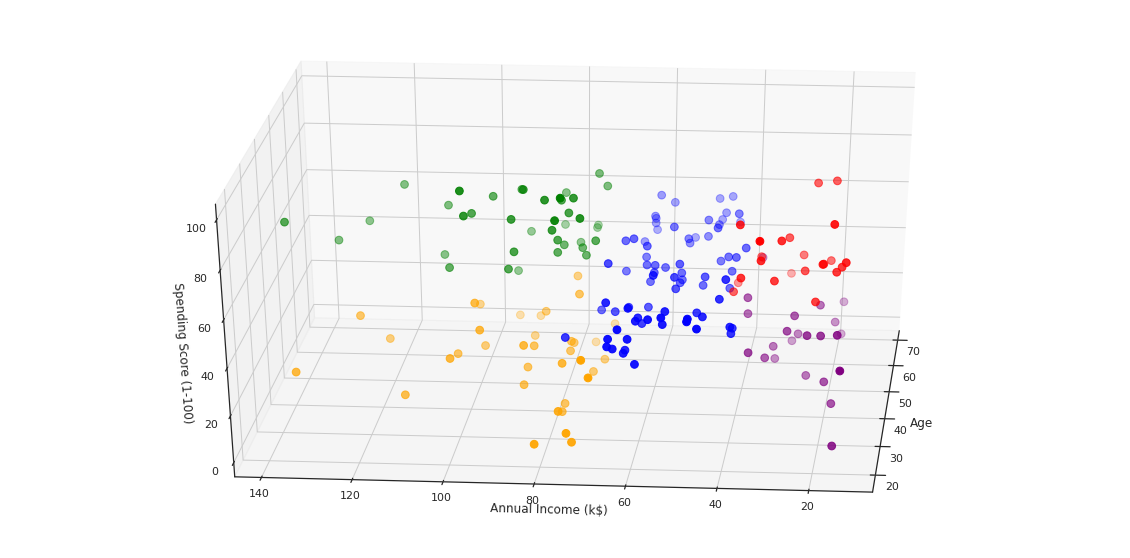

In [ ]:
km = KMeans(n_clusters=5)
clusters = km.fit_predict(customer_data.iloc[:,1:])

customer_data["label"] = clusters

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
 

fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(customer_data.Age[customer_data.label == 0], customer_data["Annual Income (k$)"][customer_data.label == 0], customer_data["Spending Score (1-100)"][customer_data.label == 0], c='blue', s=60)
ax.scatter(customer_data.Age[customer_data.label == 1], customer_data["Annual Income (k$)"][customer_data.label == 1], customer_data["Spending Score (1-100)"][customer_data.label == 1], c='red', s=60)
ax.scatter(customer_data.Age[customer_data.label == 2], customer_data["Annual Income (k$)"][customer_data.label == 2], customer_data["Spending Score (1-100)"][customer_data.label == 2], c='green', s=60)
ax.scatter(customer_data.Age[customer_data.label == 3], customer_data["Annual Income (k$)"][customer_data.label == 3], customer_data["Spending Score (1-100)"][customer_data.label == 3], c='orange', s=60)
ax.scatter(customer_data.Age[customer_data.label == 4], customer_data["Annual Income (k$)"][customer_data.label == 4], customer_data["Spending Score (1-100)"][customer_data.label == 4], c='purple', s=60)
ax.view_init(30, 185)
plt.xlabel("Age")
plt.ylabel("Annual Income (k$)")
ax.set_zlabel('Spending Score (1-100)')
plt.show()

We have 5 type of customer and we grouped them as you can see above.

THANK YOU